 # Week 7: Exercise 7.2
 File: DSC530_Paulovici_Exercise_7.2.py (.ipynb)<br>
 Name: Kevin Paulovici<br>
 Date: 10/13/2019<br>
 Course: DSC 530 Data Exploration and Analysis<br>
 Assignment: Chapter 7: 7.1 & Chapter 8: 8.1, 8.2

In [1]:
import pandas as pd
import numpy as np
import math
import random

from matplotlib import pyplot as plt 
import nsfg
import thinkplot
import thinkstats2


 ## Capter 7

 ### Exercise 7.1
 Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [2]:
# Read in pregnancy data  
preg = nsfg.ReadFemPreg()

# get all live births, drop na values, and get subset of birth weight, age, caseid
df = preg[preg.outcome == 1]
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
df = df[['agepreg', 'totalwgt_lb']]

df.head()


,agepreg,totalwgt_lb
0,33.16,8.8125
1,39.25,7.8750
2,14.33,9.1250
3,17.83,7.0000
4,18.33,6.1875


In [3]:
# Calculate Pearson and Spearman correlations using pandas method
ages = df['agepreg']
weights = df['totalwgt_lb']

pCorr = ages.corr(weights, method='pearson')
sCorr = ages.corr(weights, method='spearman')

print("Pearson's correlation is: {:.2f}".format(pCorr))
print("Spearman's correlation is: {:.2f}".format(sCorr))


Pearson's correlation is: 0.07
Spearman's correlation is: 0.09


Text(0,0.5,'Birth Weight (lbs)')

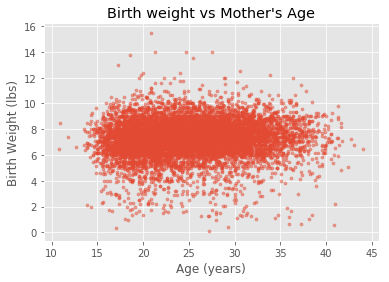

In [4]:
# Scatter Plot of birth weight and age
plt.style.use('ggplot')

plt.scatter(ages, weights, alpha = 0.5, s=10)
plt.title("Birth weight vs Mother's Age")
plt.xlabel("Age (years)")
plt.ylabel("Birth Weight (lbs)")


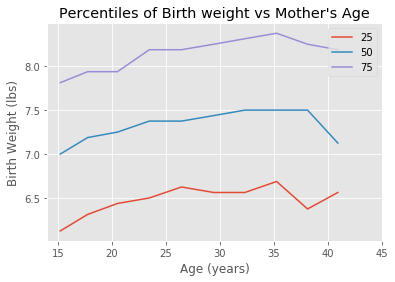

In [5]:
# Plot binned percentiles of birth weight vs age

def BinPerc(df):
    """
    param: df (data frame) - contains ages and weights
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    plt.style.use('ggplot')

    percents = [25, 50, 75]
    for p in percents:
        weights = [cdf.Percentile(p) for cdf in cdfs]
        plt.plot(ages, weights, label=str(p))

    plt.title("Percentiles of Birth weight vs Mother's Age")
    plt.xlabel("Age (years)")
    plt.ylabel("Birth Weight (lbs)")
    plt.legend()
    plt.xlim(14, 45)

BinPerc(df)


 ### Characterize the relationship between the variables
 Scatter plot shows a weak relationship between the variables. The binned percentile plot shows an increase in birth weight early on but steady's out after. Since the Pearson and Spearman correlation are close (0.07 and 0.09, respectively) it indicates a non-linear relationship.

 ## Capter 8

 ### Exercise 8.1
 In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
 Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [6]:
# Set up MeanError and RMSE function from Think Stats chap 8
def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)


In [7]:
# Calculate the mean and median for mean error, function from Chap 8

def Estimate1(n=7, iters=100000):
    """ Mean error for xbar and median as estimators
    """
    mu = 0
    sigma = 1

    means = []
    medians = []

    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print("Experiement 1")
    print('Mean error for xbar: {:.6f}'.format(MeanError(means, mu)))
    print('Mean error for median: {:.6f}'.format(MeanError(medians, mu)))

Estimate1()


Experiement 1
Mean error for xbar: 0.001235
Mean error for median: 0.001411


 xbar and median decrease as iteration increase.

In [8]:
# Calculate RMSE for biased and unbiased estimators, function from Chap 8

def Estimate2(n=7, iters=100000):
    """RMSE for biased and unbiased estimators 
    """
    mu = 0
    sigma = 1

    estimate1 = []
    estimate2 = []

    for i in range(iters):
        xs = [random.gauss(mu, sigma) for j in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimate1.append(biased)
        estimate2.append(unbiased)

    print("Experiment 2")
    print("RMSE biased: {:.6f}".format(RMSE(estimate1, sigma**2)))
    print("RMSE unbiased: {:.6f}".format(RMSE(estimate2, sigma**2)))

Estimate2()


Experiment 2
RMSE biased: 0.517281
RMSE unbiased: 0.580199


 Biased estimator results in lower RMSE than the unbiased estimator.

 ### Exercise 8.2
 Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

 Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.


The standard error for n = 5 is: 1.46319
The 90'%' confidence interval is: (1.098177753469987, 5.089600622462234)
The standard error for n = 10 is: 0.79697
The 90'%' confidence interval is: (1.2643772542991343, 3.6147422853294344)
The standard error for n = 15 is: 0.58490
The 90'%' confidence interval is: (1.3271999960699856, 3.1236721655893724)


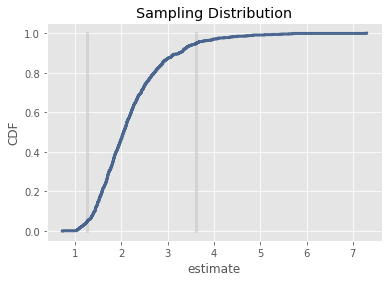

In [9]:
def Sample(lam = 2, iters = 1000):
    """ Sampling dist. of L as an estimator of exp parameter
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x,x], [0, y], color = '0.8', linewidth = 3)

    # repreat for multiple values of n
    for n in [5, 10, 15]:
        estimates = []

        for i in range(iters):
            xs = np.random.exponential(1/lam, n)
            lamhat = 1/np.mean(xs)
            estimates.append(lamhat)
        
        stderr = RMSE(estimates, lam)
        print("The standard error for n = {} is: {:.5f}".format(n, stderr))

        cdf = thinkstats2.Cdf(estimates)
        ci = cdf.Percentile(5), cdf.Percentile(95)
        print("The 90'%' confidence interval is: {}".format(ci))

        if n == 10:
            # set the lower/upper ends of confidence interval
            VertLine(ci[0])
            VertLine(ci[1])

            # plot the CDF
            thinkplot.Cdf(cdf)
            thinkplot.Config(xlabel='estimate',  ylabel='CDF', title='Sampling Distribution')

Sample()